In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Fixed RS

In [5]:
file_list = ["index_message_2016-6-4_0100B.log.csv",
             "index_message_2016-6-4_0100.log.csv",
             "index_message_2016-6-3_1413.log.csv",
             "index_message_2016-6-3_2350.log.csv",
             "index_message_2016-6-3_2400.log.csv",             
            ]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

index_message_2016-6-4_0100B.log.csv
index_message_2016-6-4_0100.log.csv
index_message_2016-6-3_1413.log.csv
index_message_2016-6-3_2350.log.csv
index_message_2016-6-3_2400.log.csv


/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
ts_name = ['1','5','10', '20', '30']
styles = ['-', '-', '-','-','-']

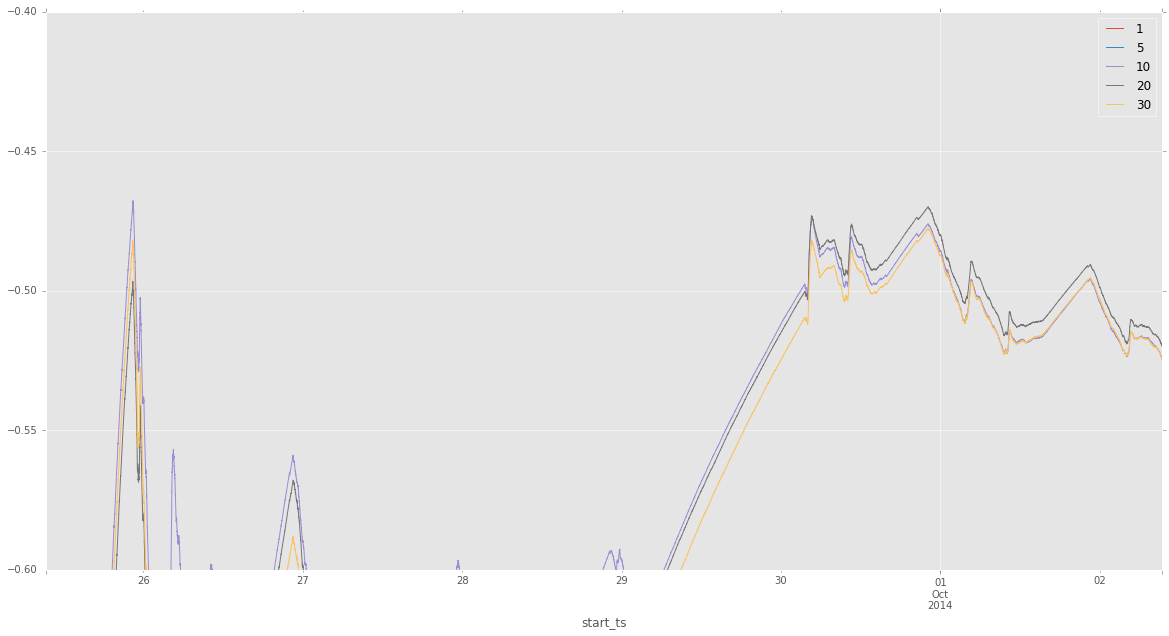

In [11]:
start = pd.to_datetime("2014-09-27 0:00:00")
end = pd.to_datetime("2014-09-28 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
    ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
            ylim=(-0.6, -0.4), 
            style=styles[i])

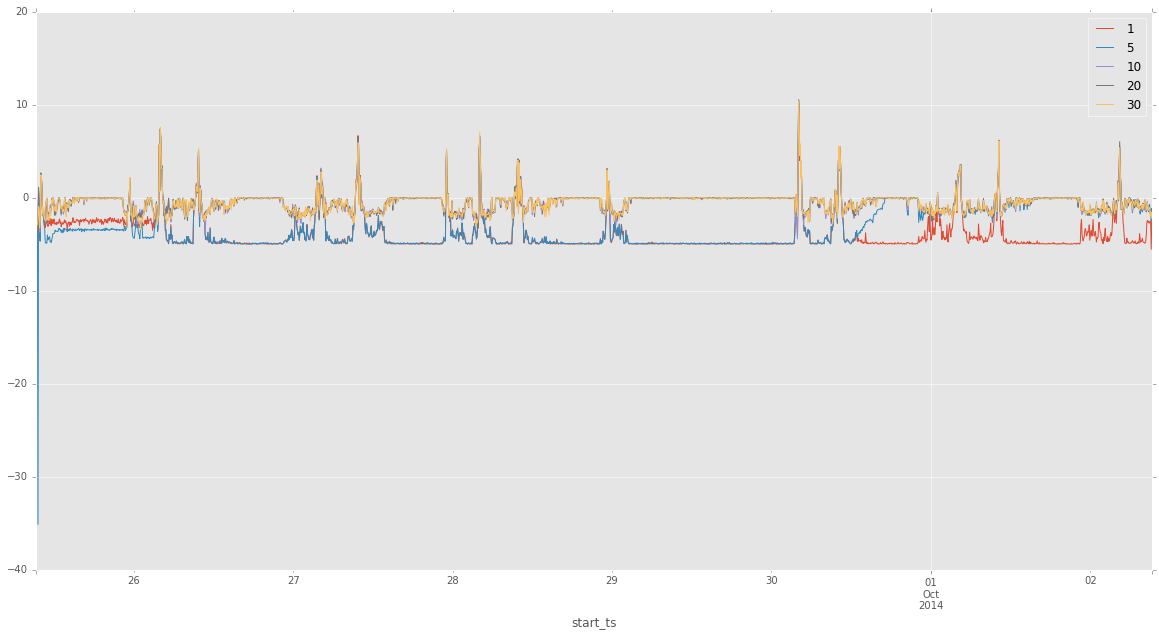

In [10]:
start = pd.to_datetime("2014-09-27 0:00:00")
end = pd.to_datetime("2014-09-28 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df['total_reward'].resample('5Min')
    ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
            #ylim=(-0.6, -0.4), 
            style=styles[i])

# Gamma

In [13]:
file_list = ["index_message_2016-6-4_0700.log.csv",
             "index_message_2016-6-4_0100B.log.csv",
             "index_message_2016-6-3_1413.log.csv",
             "index_message_2016-6-4_0800.log.csv",
             "index_message_2016-6-4_0800B.log.csv",           
            ]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

index_message_2016-6-4_0700.log.csv
index_message_2016-6-4_0100B.log.csv
index_message_2016-6-3_1413.log.csv
index_message_2016-6-4_0800.log.csv
index_message_2016-6-4_0800B.log.csv


In [17]:
ts_name = ['G=0.1, A=0.5','G=0.9, A=0.5', 'G=0.5, A=0.5','G=0.5, A=0.1', 'G=0.5, A=0.9']
styles = ['-', '-', '-','-','-']

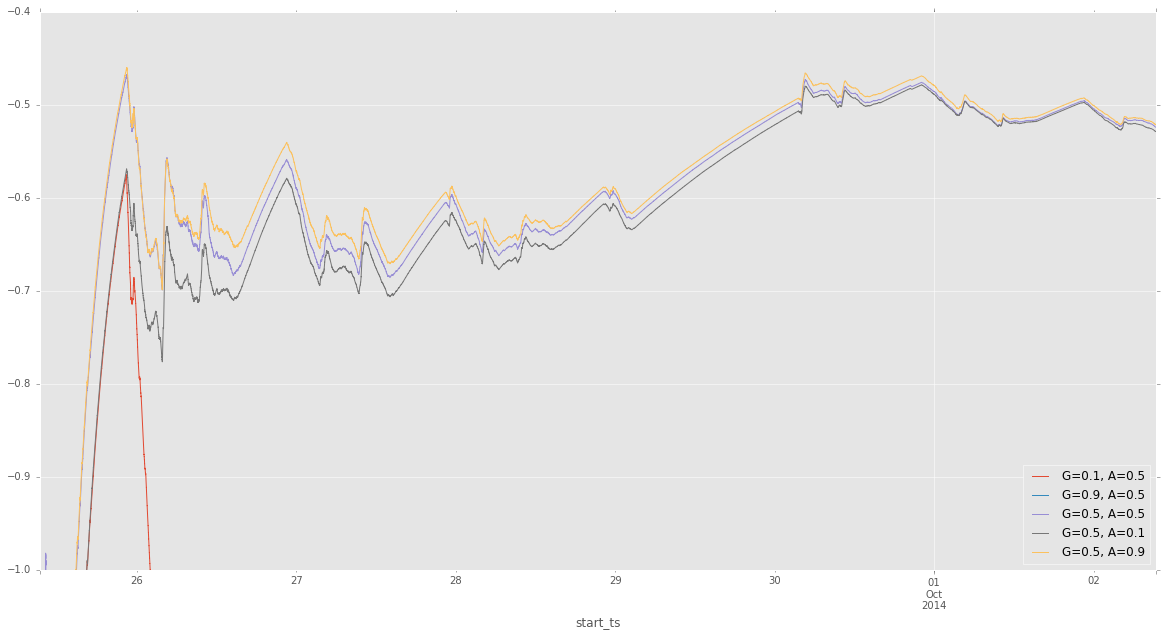

In [19]:
start = pd.to_datetime("2014-09-27 0:00:00")
end = pd.to_datetime("2014-09-28 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
    ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
            ylim=(-1, -0.4), 
            style=styles[i])